# Import packages

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline


# Upload dataset

In [2]:
df= pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.describe()
#shows unbalanced count between variables.. some values are missing

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the dataset

In [6]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# fill the missing values for numerical terms -- mean
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mean())


In [8]:
df['Gender'].mode()[0]

'Male'

In [9]:
# fill the missing values for categorical terms - mode
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']= df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']= df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#CHECKPOINT 1
df_processed= df
df_processed

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

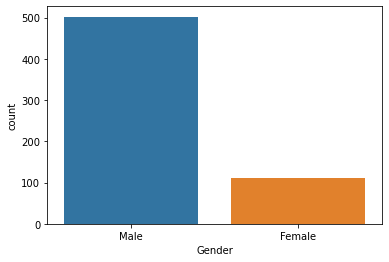

In [12]:
sns.countplot(x=df_processed['Gender'])



<AxesSubplot:xlabel='Married', ylabel='count'>

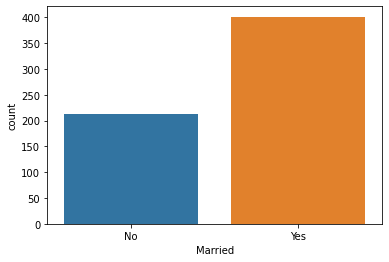

In [13]:
sns.countplot(x=df_processed['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

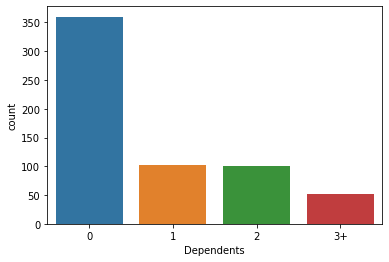

In [14]:
sns.countplot(x=df_processed['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

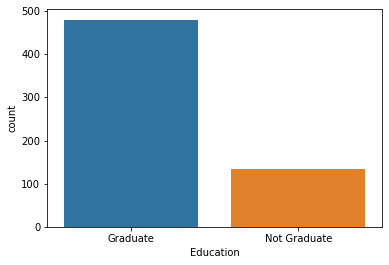

In [15]:
sns.countplot(x=df_processed['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

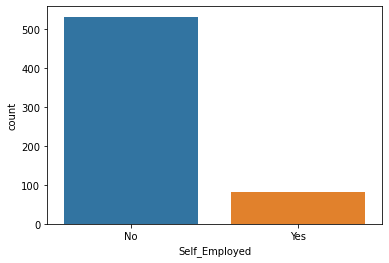

In [16]:
sns.countplot(x=df_processed['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

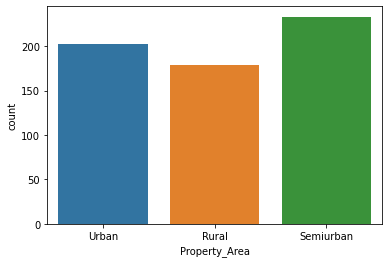

In [17]:
sns.countplot(x=df_processed['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

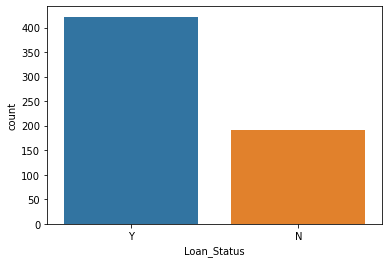

In [18]:
sns.countplot(x=df_processed['Loan_Status'])

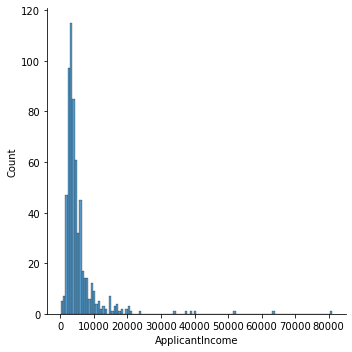

In [19]:
sns.displot(x=df_processed['ApplicantIncome'])

#Chaning all values to log
df['ApplicantIncome']= np.log(df['ApplicantIncome'])

sns.displot(x=df['ApplicantIncome'])

sns.displot(x=df['CoapplicantIncome'])

df['CoapplicantIncome']=np.log(df['CoapplicantIncome'])
sns.displot(x=df['CoapplicantIncome'])

sns.displot(x=df['LoanAmount'])

df['LoanAmount']= np.log(df['LoanAmount'])
sns.displot(x=df['LoanAmount'])

sns.displot(x=df['Loan_Amount_Term'])

df['Loan_Amount_Term']= np.log(df['Loan_Amount_Term'])
sns.displot(x=df['Loan_Amount_Term'])

sns.displot(x=df['Credit_History'])

# Creation of new attributes

In [20]:
# total income
df_processed['total_income']= df_processed['ApplicantIncome'] +df_processed['CoapplicantIncome']

In [21]:
df_processed['total_income']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: total_income, Length: 614, dtype: float64

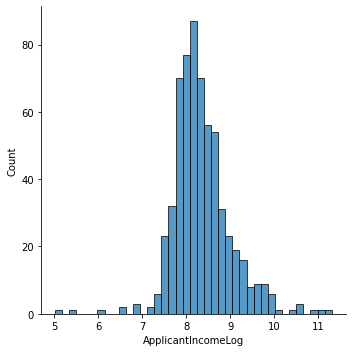

In [22]:
df_processed['ApplicantIncomeLog']= np.log(df_processed['ApplicantIncome'])
sns.displot(x=df_processed['ApplicantIncomeLog'])

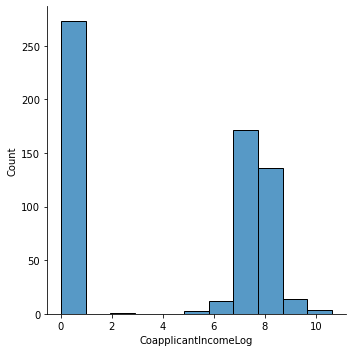

In [23]:
df_processed['CoapplicantIncomeLog']= np.log(1+df_processed['CoapplicantIncome'])
sns.displot(x=df_processed['CoapplicantIncomeLog'])


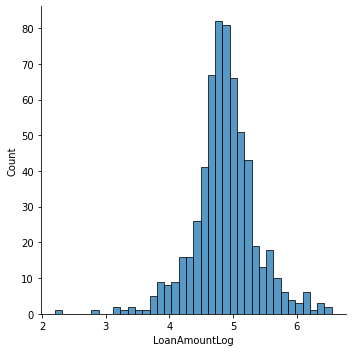

In [24]:
df_processed['LoanAmountLog']= np.log(df_processed['LoanAmount'])
sns.displot(x=df_processed['LoanAmountLog'])

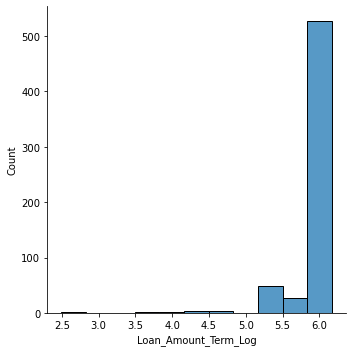

In [25]:
df_processed['Loan_Amount_Term_Log']= np.log(df_processed['Loan_Amount_Term'])
sns.displot(x=df_processed['Loan_Amount_Term_Log'])

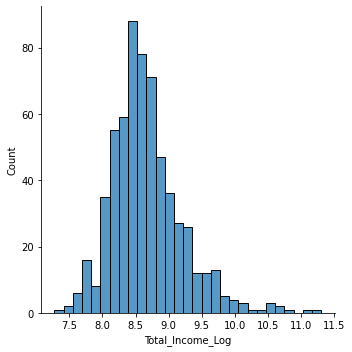

In [26]:
df_processed['Total_Income_Log']= np.log(df_processed['total_income'])
sns.displot(x=df_processed['Total_Income_Log'])

# Correlation Matrix

<AxesSubplot:>

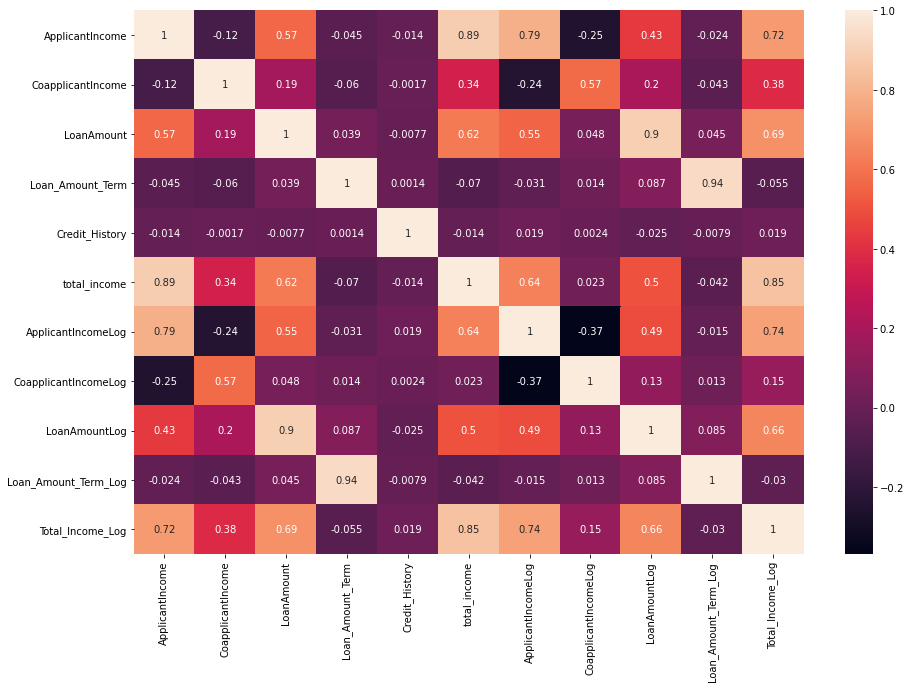

In [27]:
corr = df_processed.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [28]:
df_processed.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,0.000000,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.319202,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,0.000000,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765993,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,0.000000,4.948760,5.886104,8.699515


# SECOND CHECKPOINT

In [47]:
df_transformed= df_processed
df_transformed.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,0.000000,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.319202,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,0.000000,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765993,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,0.000000,4.948760,5.886104,8.699515


In [48]:
#drop unnecssary columns
cols= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'total_income', 'Loan_ID', 'CoapplicantIncomeLog']

df_transformed= df_transformed.drop(columns= cols, axis=1)
df_transformed.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


# Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
cols= ['Gender','Married', 'Education', 'Self_Employed','Dependents', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    df_transformed[col]= le.fit_transform(df_transformed[col])
    

In [52]:

df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    int64  
 1   Married               614 non-null    int64  
 2   Dependents            614 non-null    int32  
 3   Education             614 non-null    int64  
 4   Self_Employed         614 non-null    int64  
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    int32  
 7   Loan_Status           614 non-null    int32  
 8   ApplicantIncomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  Total_Income_Log      614 non-null    float64
dtypes: float64(5), int32(3), int64(4)
memory usage: 50.5 KB


# Checkpoint 3

In [53]:
df_data= df_transformed
df_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Train-Test Split


In [54]:
x= df_data.drop(columns=['Loan_Status'], axis= 1)
y= df_data['Loan_Status']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

# Model Training

In [65]:
#classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is ", model.score(x_test, y_test)*100 )
    #cross Validation- it is used to better validation of model
    score= cross_val_score(model,x,y, cv=5)
    print("cross_validation is ", np.mean(score)*100)
    
    

# Linear Regression

In [68]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
classify(model,x,y)


Accuracy is  77.27272727272727
cross_validation is  80.9462881514061


# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
classify(model,x,y)


Accuracy is  72.72727272727273
cross_validation is  71.1795281887245


In [75]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model=RandomForestClassifier()
classify(model, x,y)

Accuracy is  75.97402597402598
cross_validation is  78.50459816073571


In [77]:
model= ExtraTreesClassifier()
classify(model,x,y)

Accuracy is  72.07792207792207
cross_validation is  77.20245235239237


# Hyperparameter tuning -- for better accuracy

In [85]:
model= RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth= 7, max_features=1)
classify(model, x,y)

Accuracy is  76.62337662337663
cross_validation is  80.45715047314405


# Confusion Matrix

In [86]:
model= RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [91]:
from sklearn.metrics import confusion_matrix
y_pred= model.predict(x_test)
cn=confusion_matrix(y_test, y_pred)
cn

array([[23, 31],
       [ 4, 96]], dtype=int64)

<AxesSubplot:>

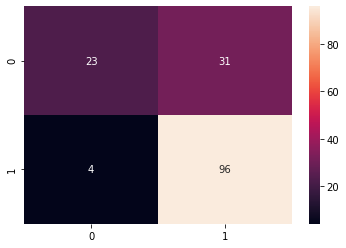

In [92]:
sns.heatmap(cn, annot=True)